In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from pprint import pprint

# Importing data

    Files on spirit are there: /bdd/DYAMOND/SAM-4km/

    Read variables there: /bdd/DYAMOND/SAM-4km/datadescription.txt
    
    Read about filenames and times: /bdd/DYAMOND/SAM-4km/README

In [6]:
path_dy = '/bdd/DYAMOND/SAM-4km/'
path_dy_2D = os.path.join(path_dy,'OUT_2D')
path_dy_3D = os.path.join(path_dy,'OUT_3D')

# example data files
data_2D_dy_ex = xr.open_dataset(os.path.join(path_dy_2D,'DYAMOND_9216x4608x74_7.5s_4km_4608_0000313680.PW.2D.nc'))
data_3D_dy_ex = xr.open_dataset(os.path.join(path_dy_3D,'DYAMOND_9216x4608x74_7.5s_4km_4608_0000313920_QV.nc'))

    Relation table DYAMOND-TOOCAN

In [3]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('../input',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


    Load one timestep as an example

In [4]:
# pick a index in the list
i_t = 1000
# retrieve paths
root_DYAMOND = df.iloc[i_t]['path_dyamond']
file_PW_DYAMOND = root_DYAMOND+'.PW.2D.nc'
path_TOOCAN = df.iloc[i_t]['img_seg_path']

In [7]:
# Load DYAMOND data
PW_dy = xr.open_dataarray(os.path.join(path_dy_2D,file_PW_DYAMOND))

In [8]:
# Load TOOCAN data
img_TOOCAN = xr.open_dataarray(os.path.join('/',path_TOOCAN),decode_cf=True)
# show
img_TOOCAN

/home/bfildier/.local/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.DataArray 'MCS_label' (time: 1, latitude: 2072, longitude: 9216)>
[19095552 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -40.0 -39.96 -39.92 ... 39.92 39.96 40.0
  * longitude  (longitude) float32 0.01953 0.05859 0.09766 ... 359.9 359.9 360.0
  * time       (time) datetime64[ns] 2016-08-21T21:00:00
Attributes:
    units:           
    standard_name:  MCS_label
    long_name:      MCS labellisation

# Display

    Show a map of DYAMOND data and MCS masks

In [9]:
import cartopy.crs as ccrs
import numpy as np

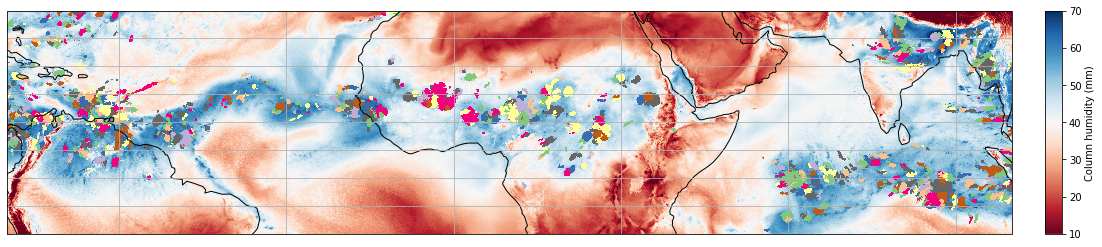

In [10]:
fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.RdBu
# cmap_mcs = plt.cm.get_cmap('rainbow', 10)
cmap_mcs = plt.cm.get_cmap('Accent', 10)
clim = (10,70)
lon_lim = (280,100)
lat_lim = (-10,30)
slice_lat = slice(*lat_lim)

for slice_lon in slice(lon_lim[0],360),slice(0,lon_lim[1]):


    lat_dyamond = PW_dy.lat.sel(lat=slice_lat)
    lon_dyamond = PW_dy.lon.sel(lon=slice_lon)

    lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)
    
    # Background
    Z = PW_dy.sel(lon=slice_lon,lat=slice_lat)[0]
    # Z = Precac_dy.sel(lon=slice_lon,lat=slice_lat)[0]
    
    im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),alpha=0.9,cmap=cmap)
    im.set_clim(*clim)
    
    # MCSs
    
    lat_toocan = img_TOOCAN.latitude.sel(latitude=slice_lat)
    lon_toocan = img_TOOCAN.longitude.sel(longitude=slice_lon)

    lonarray_toocan,latarray_toocan = np.meshgrid(lon_toocan,lat_toocan)

    
    IMG_SEG = img_TOOCAN.sel(longitude=slice_lon,latitude=slice_lat)[0]%10
    # IMG_roll = np.concatenate((IMG_SEG[0].values, IMG_SEG[0].values), axis=1)
    
    im_MCS = ax.pcolormesh(lonarray_toocan,latarray_toocan,IMG_SEG,transform=ccrs.PlateCarree(),cmap=cmap_mcs,alpha=1)

    
ax.set_extent([lon_lim[0]-360,lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
ax.coastlines('110m')
ax.gridlines()

# colorbar
x,y,w,h = ax.get_position().bounds
dx = w/60
cax = plt.axes([x+w+2*dx,y,dx,h])
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Column humidity (mm)')

# # Save
# plt.savefig(os.path.join(DIR_FIG,'PW_and_MCSs_lat%d_lon%d_time%d.png'%(*lon_lim,i_t)),dpi=300,bbox_inches='tight')
plt.show()